<a href="https://colab.research.google.com/github/Zelkova46/kenkyushimasu_Nikkei225/blob/main/multivariate_Cleaned_Nikkei225_daily_forecastingNclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

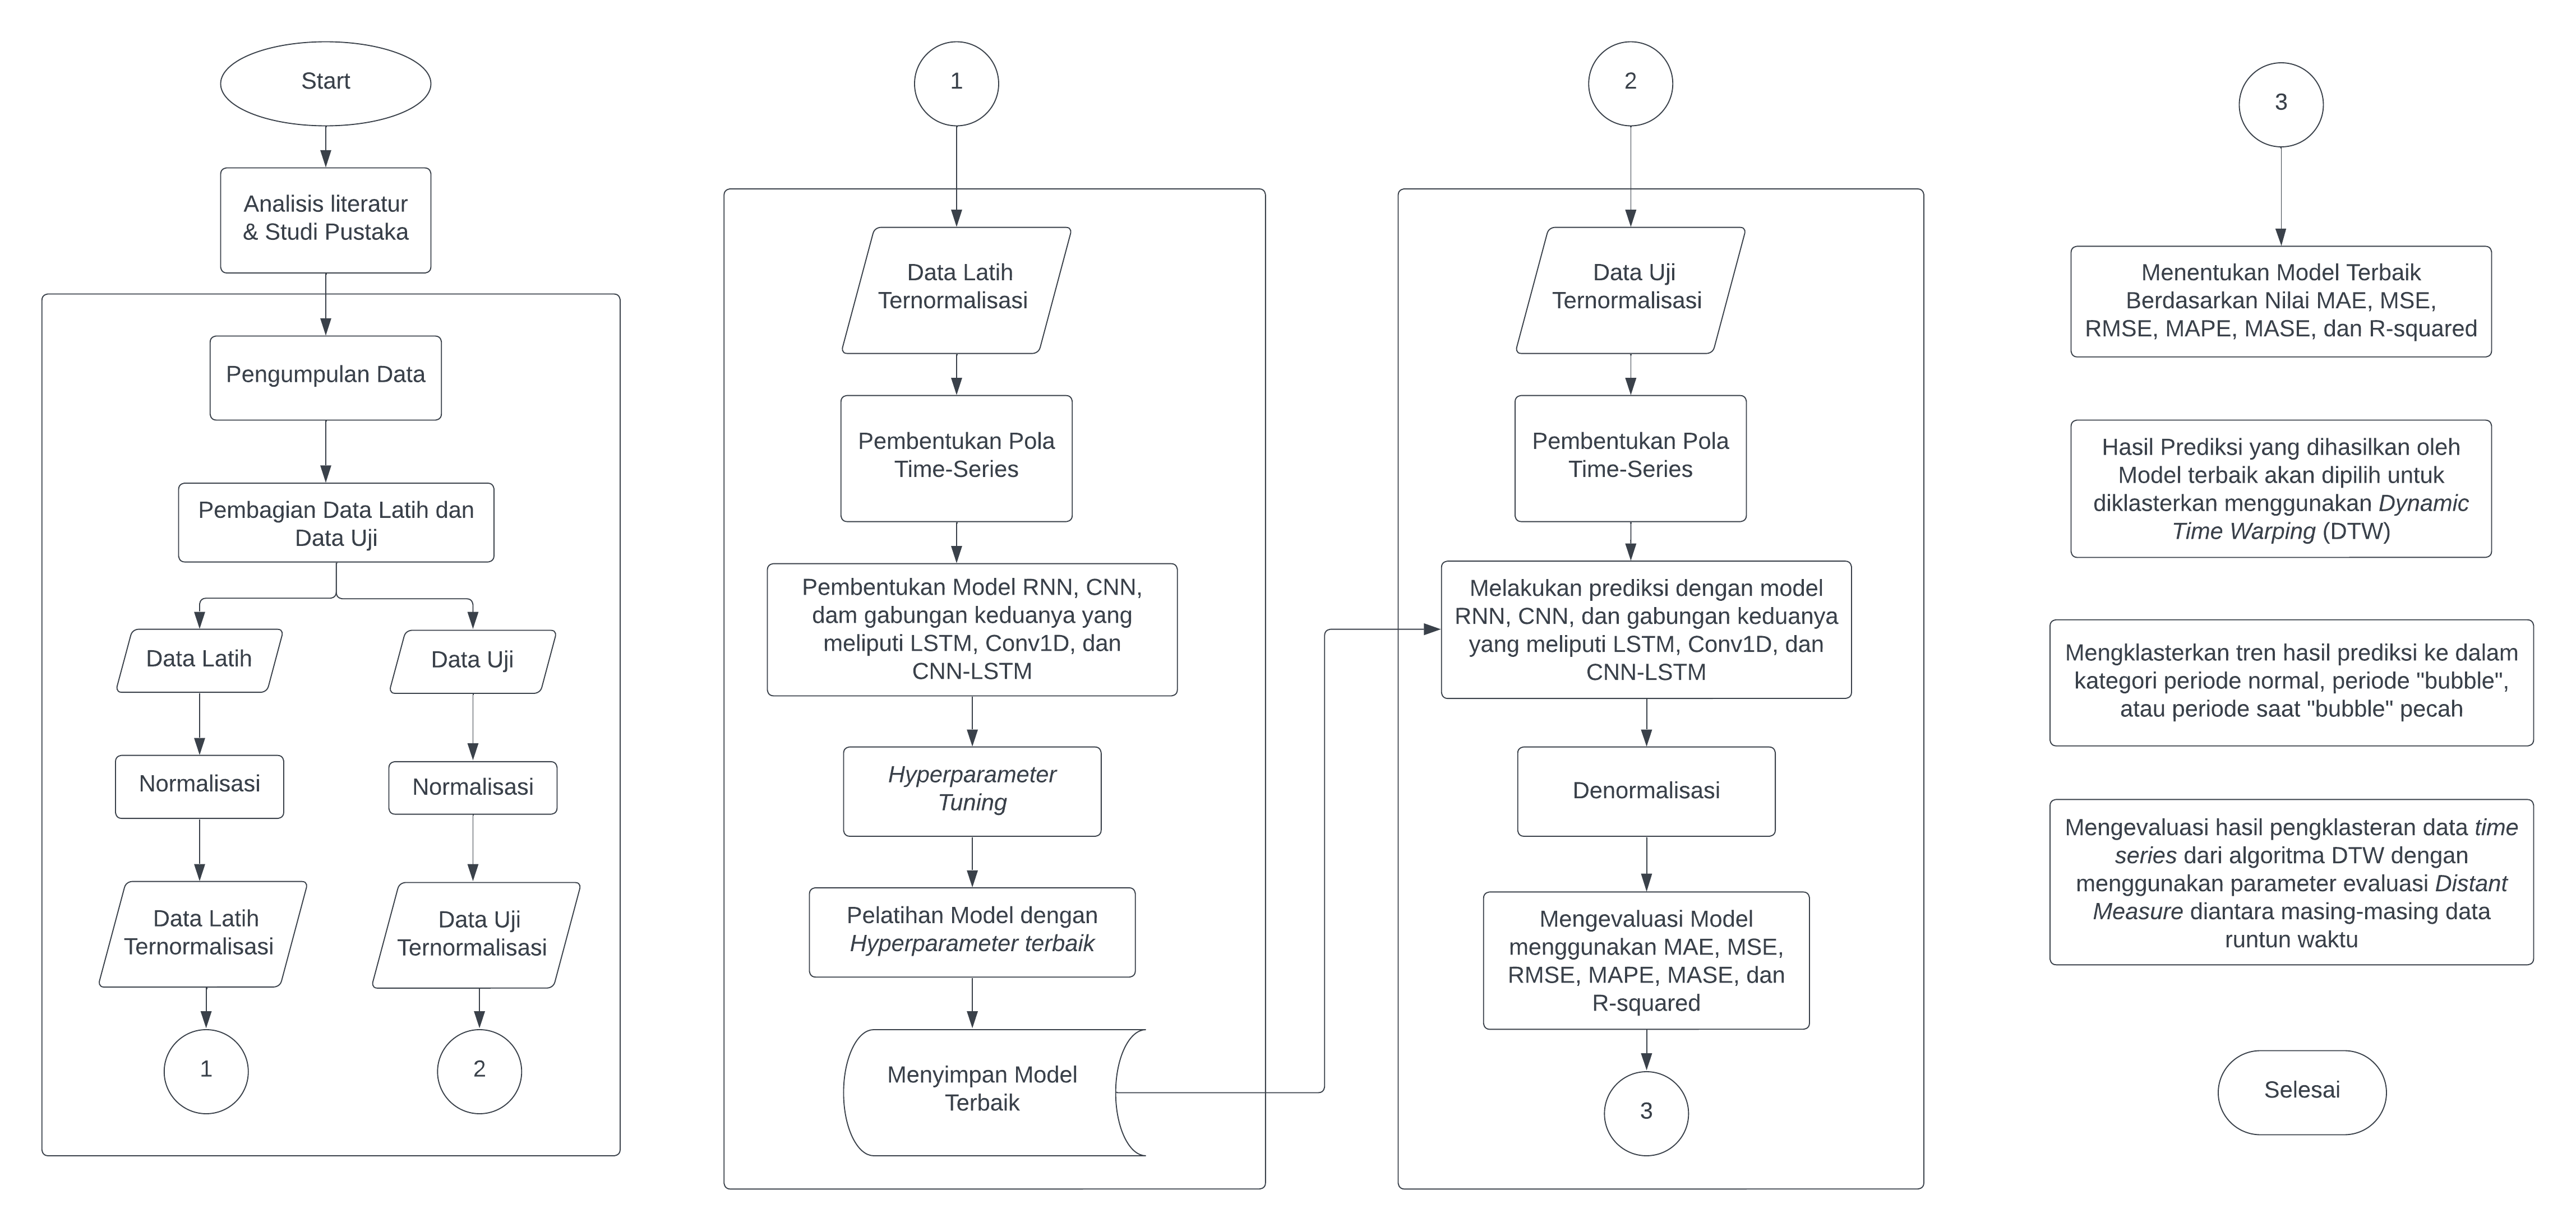

## Get Data

Sumber data: https://finance.yahoo.com/quote/%5EN225?p=%5EN225


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [264]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv

--2024-02-22 04:26:20--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/%5EN225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112773 (1.1M) [text/plain]
Saving to: ‘^N225_daily.csv.1’

^N225_daily.csv.1   100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2024-02-22 04:26:20 (52.6 MB/s) - ‘^N225_daily.csv.1’ saved [1112773/1112773]



## Import data time series dengan pandas

In [265]:
# import dengan pandas
import pandas as pd
# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/^N225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,33414.511719,33414.511719,33221.570313,33254.031250,33254.031250,58900000.0
2023-12-26,33295.679688,33312.261719,33181.359375,33305.851563,33305.851563,68300000.0
2023-12-27,33532.968750,33755.750000,33521.519531,33681.238281,33681.238281,93700000.0
2023-12-28,33477.468750,33571.730469,33411.238281,33539.621094,33539.621094,73300000.0
2023-12-29,33458.640625,33652.710938,33305.171875,33464.171875,33464.171875,89000000.0


In [266]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14351 entries, 1968-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       13773 non-null  float64
 1   High       13773 non-null  float64
 2   Low        13773 non-null  float64
 3   Close      13773 non-null  float64
 4   Adj Close  13773 non-null  float64
 5   Volume     13773 non-null  float64
dtypes: float64(6)
memory usage: 784.8 KB


data saham hanya digunakan saat harga close

In [270]:
nikkei225_4_df = nikkei225_df[['Open', 'High', 'Low', 'Close']]
print(nikkei225_4_df)


                    Open          High           Low         Close
Date                                                              
1968-01-04   1266.270020   1266.270020   1266.270020   1266.270020
1968-01-05   1282.380005   1282.380005   1282.380005   1282.380005
1968-01-08   1283.530029   1283.530029   1283.530029   1283.530029
1968-01-09   1305.939941   1305.939941   1305.939941   1305.939941
1968-01-10           NaN           NaN           NaN           NaN
...                  ...           ...           ...           ...
2023-12-25  33414.511719  33414.511719  33221.570313  33254.031250
2023-12-26  33295.679688  33312.261719  33181.359375  33305.851563
2023-12-27  33532.968750  33755.750000  33521.519531  33681.238281
2023-12-28  33477.468750  33571.730469  33411.238281  33539.621094
2023-12-29  33458.640625  33652.710938  33305.171875  33464.171875

[14351 rows x 4 columns]


Informasi jumlah data

In [272]:
len(nikkei225_4_df)

14351

menampilkan missing data

In [274]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_4_df[nikkei225_4_df['Close'].isnull()]
print(rows_with_null_close)

            Open  High  Low  Close
Date                              
1968-01-10   NaN   NaN  NaN    NaN
1968-01-15   NaN   NaN  NaN    NaN
1968-02-12   NaN   NaN  NaN    NaN
1968-03-21   NaN   NaN  NaN    NaN
1968-04-29   NaN   NaN  NaN    NaN
...          ...   ...  ...    ...
2018-09-24   NaN   NaN  NaN    NaN
2018-10-08   NaN   NaN  NaN    NaN
2018-11-23   NaN   NaN  NaN    NaN
2018-12-24   NaN   NaN  NaN    NaN
2018-12-31   NaN   NaN  NaN    NaN

[578 rows x 4 columns]


In [275]:
nikkei225_4_df.isnull().sum()

Open     578
High     578
Low      578
Close    578
dtype: int64

## menghapus semua data yang memiliki nilai NULL

In [277]:
nikkei225_4_df = nikkei225_4_df.dropna()


In [279]:
len(nikkei225_4_df)

13773

In [280]:
nikkei225_4_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate dan money supply

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [281]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv

--2024-02-22 04:33:04--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8741 (8.5K) [text/plain]
Saving to: ‘discountRate.csv.1’

discountRate.csv.1  100%[===================>]   8.54K  --.-KB/s    in 0s      

2024-02-22 04:33:05 (70.0 MB/s) - ‘discountRate.csv.1’ saved [8741/8741]



In [282]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv

--2024-02-22 04:33:06--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8817 (8.6K) [text/plain]
Saving to: ‘moneyStock.csv.1’

moneyStock.csv.1    100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-02-22 04:33:06 (87.7 MB/s) - ‘moneyStock.csv.1’ saved [8817/8817]



# Import data time seres tambahan: discount rate dan money supply

import data discount rate

In [283]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[:3]

,discRate
Date,
1968-01-01,6.21
1968-02-01,6.21
1968-03-01,6.21


In [284]:
len(discRate_df)

672

menampilkan missing data

In [285]:
print(discRate_df.isnull().sum())

discRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [286]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [287]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [6.21, 6.21, 6.21])

In [288]:
len(discountRate_value)

672

import data money supply menjadi dataframe

In [289]:
# import dengan pandas
import pandas as pd
# membaca data money supply
moneySupply_df = pd.read_csv("/content/moneyStock.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

moneySupply_df[:3]

,moneyStock
Date,
1968-01-01,15.7
1968-02-01,15.8
1968-03-01,15.3


In [290]:
len(moneySupply_df)

672

menampilkan missing data

In [291]:
print(moneySupply_df.isnull().sum())

moneyStock    0
dtype: int64


import data money supply (M2)

In [292]:
# import dan format historikal data dengan python

timesteps_moneyStock = []
moneyStock_value = []

with open("/content/moneyStock.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_moneyStock.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    moneyStock_value.append(float(line[1])) #membaca nilai moneyStock


In [293]:
timesteps_moneyStock[:3], moneyStock_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [15.7, 15.8, 15.3])

In [294]:
type(timesteps_moneyStock), type(moneyStock_value)

(list, list)

In [295]:
len(moneyStock_value)

672

# Mengumpulkan data menjadi satu dataframe

In [299]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_4_multivariate_df = nikkei225_4_df.copy()

# menambahkan kolom money stock dan dsicount rate
nikkei225_4_multivariate_df["money_stock"] = None
nikkei225_4_multivariate_df["discount_rate"] = None
nikkei225_4_multivariate_df

,Open,High,Low,Close,money_stock,discount_rate
Date,,,,,,
1968-01-04,1266.270020,1266.270020,1266.270020,1266.270020,None,None
1968-01-05,1282.380005,1282.380005,1282.380005,1282.380005,None,None
1968-01-08,1283.530029,1283.530029,1283.530029,1283.530029,None,None
1968-01-09,1305.939941,1305.939941,1305.939941,1305.939941,None,None
1968-01-11,1316.890015,1316.890015,1316.890015,1316.890015,None,None
...,...,...,...,...,...,...
2023-12-25,33414.511719,33414.511719,33221.570313,33254.031250,None,None
2023-12-26,33295.679688,33312.261719,33181.359375,33305.851563,None,None
2023-12-27,33532.968750,33755.750000,33521.519531,33681.238281,None,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [300]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_4_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_4_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_4_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_4_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_4_multivariate_df.loc[date_to_index, "money_stock"] = moneyStock_value[x]
      nikkei225_4_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [301]:
moneySupply_df[:3], discRate_df[:3]

(            moneyStock
 Date                  
 1968-01-01        15.7
 1968-02-01        15.8
 1968-03-01        15.3,
             discRate
 Date                
 1968-01-01      6.21
 1968-02-01      6.21
 1968-03-01      6.21)

In [302]:
nikkei225_4_multivariate_df[:30]

,Open,High,Low,Close,money_stock,discount_rate
Date,,,,,,
1968-01-04,1266.270020,1266.270020,1266.270020,1266.270020,15.7,6.21
1968-01-05,1282.380005,1282.380005,1282.380005,1282.380005,15.7,6.21
1968-01-08,1283.530029,1283.530029,1283.530029,1283.530029,15.7,6.21
1968-01-09,1305.939941,1305.939941,1305.939941,1305.939941,15.7,6.21
1968-01-11,1316.890015,1316.890015,1316.890015,1316.890015,15.7,6.21
1968-01-12,1314.469971,1314.469971,1314.469971,1314.469971,15.7,6.21
1968-01-16,1314.979980,1314.979980,1314.979980,1314.979980,15.7,6.21
1968-01-17,1314.979980,1314.979980,1314.979980,1314.979980,15.7,6.21
1968-01-18,1322.989990,1322.989990,1322.989990,1322.989990,15.7,6.21


In [303]:

type(nikkei225_4_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [304]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (mingguan)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

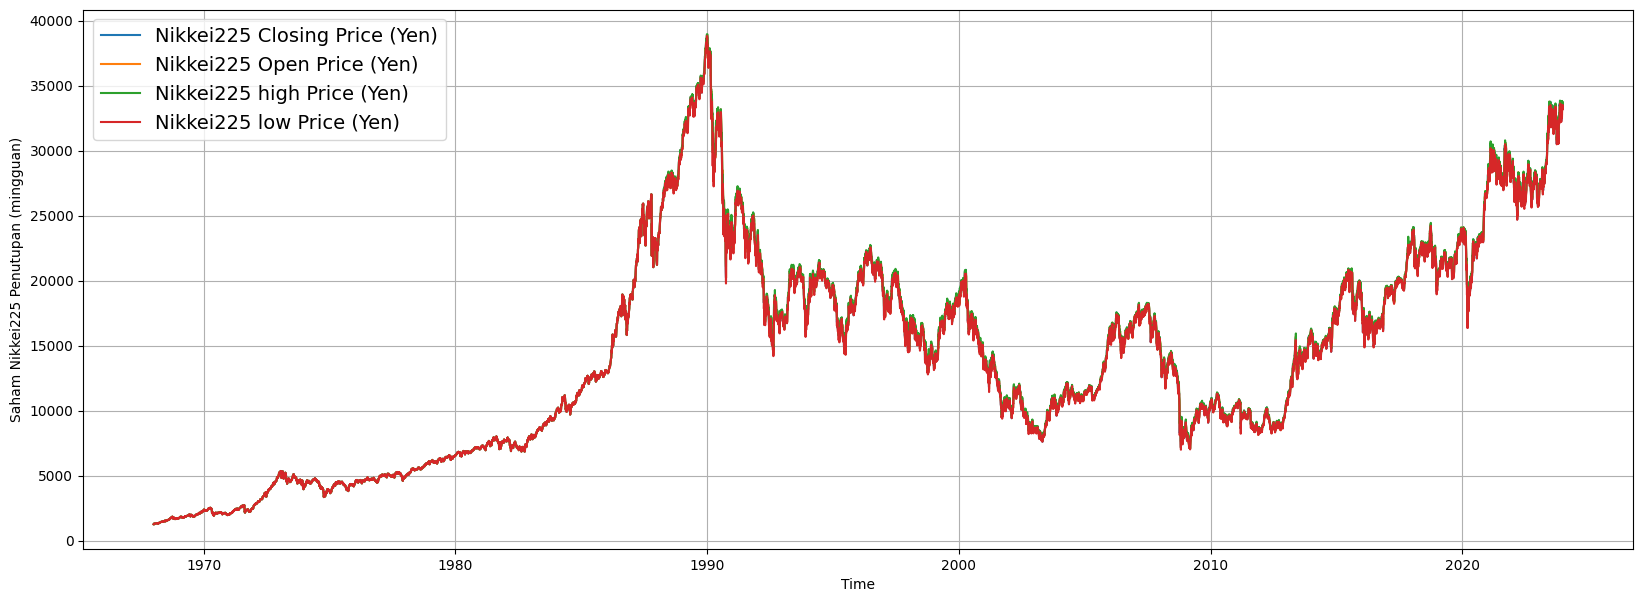

In [306]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['Close'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['Open'].tolist(), format = "-", label = "Nikkei225 Open Price (Yen)")
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['High'].tolist(), format = "-", label = "Nikkei225 high Price (Yen)")
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['Low'].tolist(), format = "-", label = "Nikkei225 low Price (Yen)")


Visualisasi data discount rate

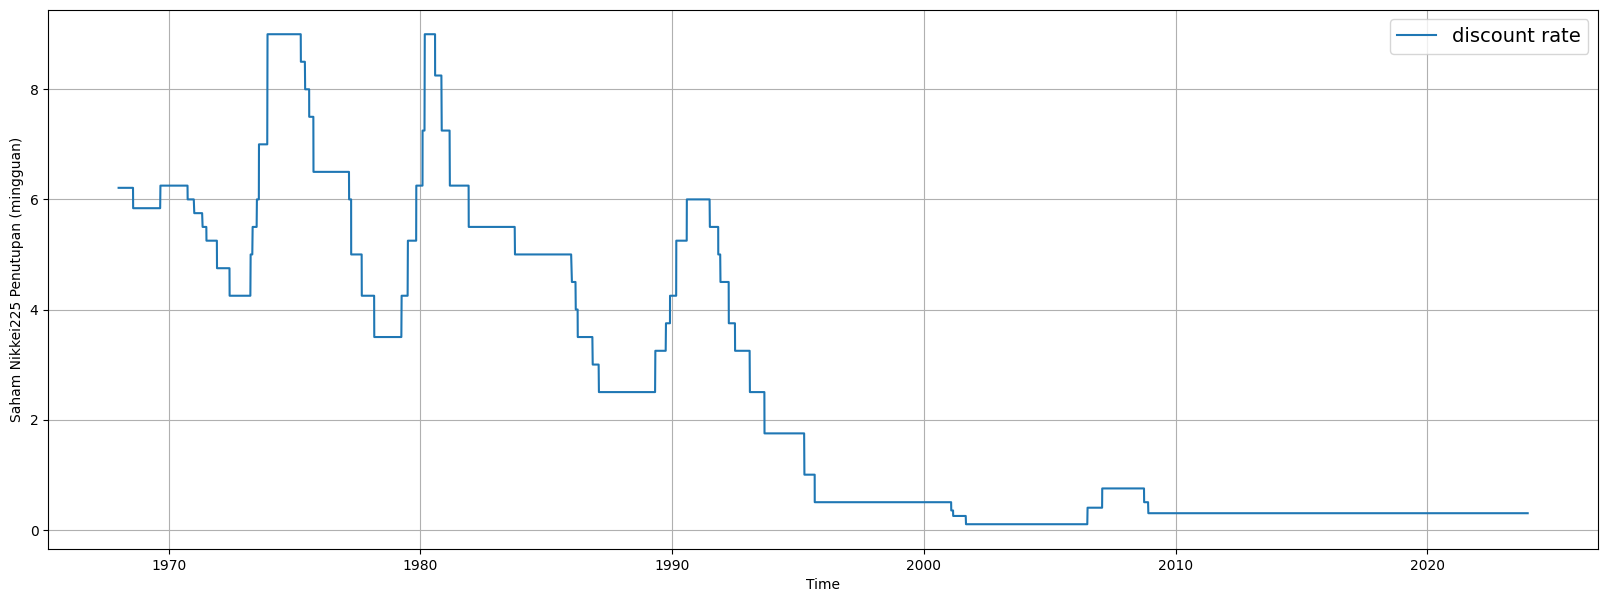

In [307]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


Visualisasi data money supply

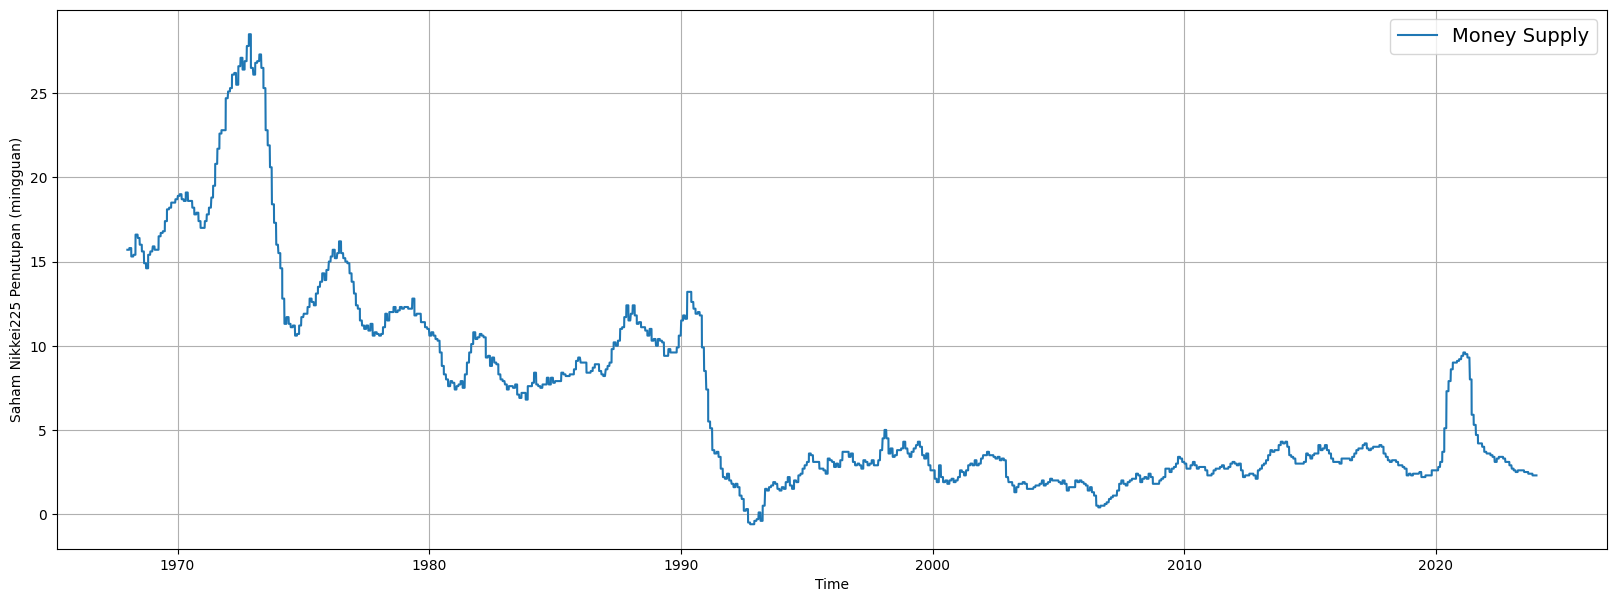

In [309]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['money_stock'].tolist(), format = "-", label = "Money Supply")


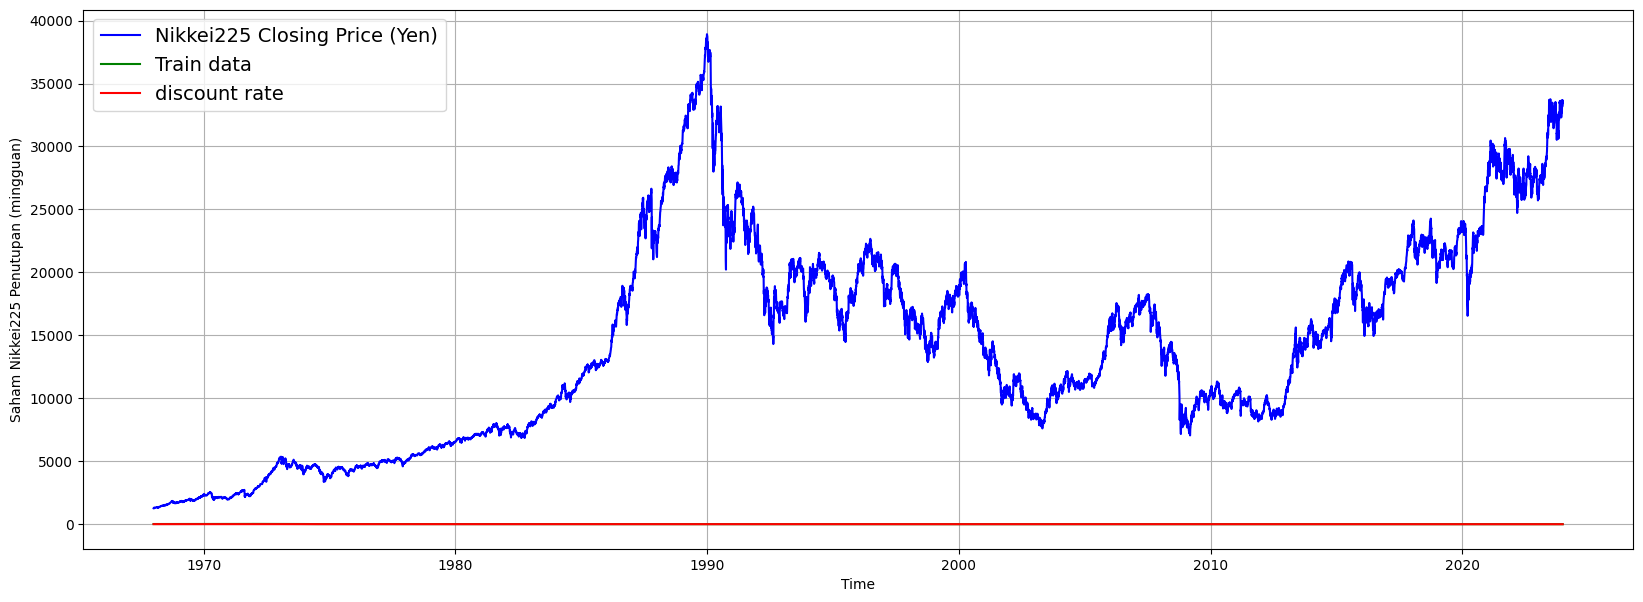

In [311]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['Close'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = nikkei225_4_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [312]:
# Langkah 1 : konversi setiap fitur menjadi 2D-array dengan konfigurasi : (jumlah sample, 1)


In [313]:
from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(nikkei225_4_multivariate_df)

MinMaxScaler()

In [314]:
# Melakukan normalization
scaler.transform(nikkei225_4_multivariate_df)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.60137457e-01, 6.86516854e-01],
       [4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
        5.60137457e-01, 6.86516854e-01],
       [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
        5.60137457e-01, 6.86516854e-01],
       ...,
       [8.56894820e-01, 8.61991782e-01, 8.58733018e-01, 8.60964455e-01,
        9.96563574e-02, 2.24719101e-02],
       [8.55420927e-01, 8.57109484e-01, 8.55796995e-01, 8.57203002e-01,
        9.96563574e-02, 2.24719101e-02],
       [8.54920916e-01, 8.59258010e-01, 8.52973184e-01, 8.55199018e-01,
        9.96563574e-02, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [315]:
normalized_data  = scaler.transform(nikkei225_4_multivariate_df)
normalized_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.60137457e-01, 6.86516854e-01],
       [4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
        5.60137457e-01, 6.86516854e-01],
       [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
        5.60137457e-01, 6.86516854e-01],
       ...,
       [8.56894820e-01, 8.61991782e-01, 8.58733018e-01, 8.60964455e-01,
        9.96563574e-02, 2.24719101e-02],
       [8.55420927e-01, 8.57109484e-01, 8.55796995e-01, 8.57203002e-01,
        9.96563574e-02, 2.24719101e-02],
       [8.54920916e-01, 8.59258010e-01, 8.52973184e-01, 8.55199018e-01,
        9.96563574e-02, 2.24719101e-02]])

In [316]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (13773, 6)


In [317]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27826931e-04],
       [4.58367695e-04],
       ...,
       [8.56894820e-01],
       [8.55420927e-01],
       [8.54920916e-01]])

In [318]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [342]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_4_multivariate_df = pd.DataFrame(normalized_data, columns=nikkei225_4_multivariate_df.columns)


In [343]:
scaled_nikkei225_4_multivariate_df

,Open,High,Low,Close,money_stock,discount_rate
0,0.000000,0.000000,0.000000,0.000000,0.560137,0.686517
1,0.000428,0.000427,0.000429,0.000428,0.560137,0.686517
2,0.000458,0.000458,0.000460,0.000458,0.560137,0.686517
3,0.001053,0.001052,0.001056,0.001054,0.560137,0.686517
4,0.001344,0.001343,0.001348,0.001345,0.560137,0.686517
...,...,...,...,...,...,...
13768,0.853749,0.852938,0.850747,0.849618,0.099656,0.022472
13769,0.850593,0.850225,0.849677,0.850994,0.099656,0.022472
13770,0.856895,0.861992,0.858733,0.860964,0.099656,0.022472
13771,0.855421,0.857109,0.855797,0.857203,0.099656,0.022472


LAtihan denormalisasi

In [344]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [345]:
len(scaler.transform(nikkei225_4_multivariate_df))

13773

In [346]:
scaler.transform(nikkei225_4_multivariate_df)[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27826931e-04],
       [4.58367695e-04],
       ...,
       [8.56894820e-01],
       [8.55420927e-01],
       [8.54920916e-01]])

Visualisasi data yang di normalisasi

In [347]:
scaled_nikkei225_4_multivariate_df["money_stock"]

0        0.560137
1        0.560137
2        0.560137
3        0.560137
4        0.560137
           ...   
13768    0.099656
13769    0.099656
13770    0.099656
13771    0.099656
13772    0.099656
Name: money_stock, Length: 13773, dtype: float64

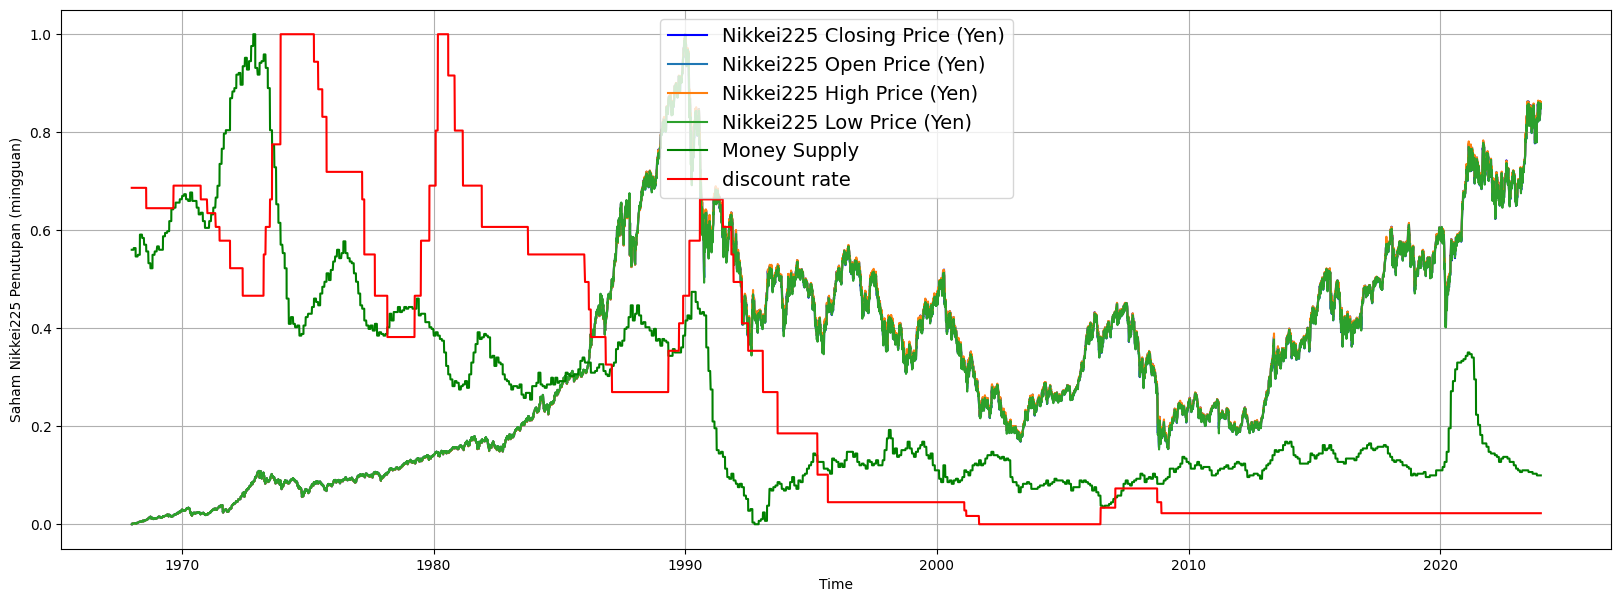

In [350]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["Close"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["Open"], format = "-", label = "Nikkei225 Open Price (Yen)")
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["High"], format = "-", label = "Nikkei225 High Price (Yen)")
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["Low"], format = "-", label = "Nikkei225 Low Price (Yen)")

plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["money_stock"], format = "-", label = "Money Supply", color ='g')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = scaled_nikkei225_4_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


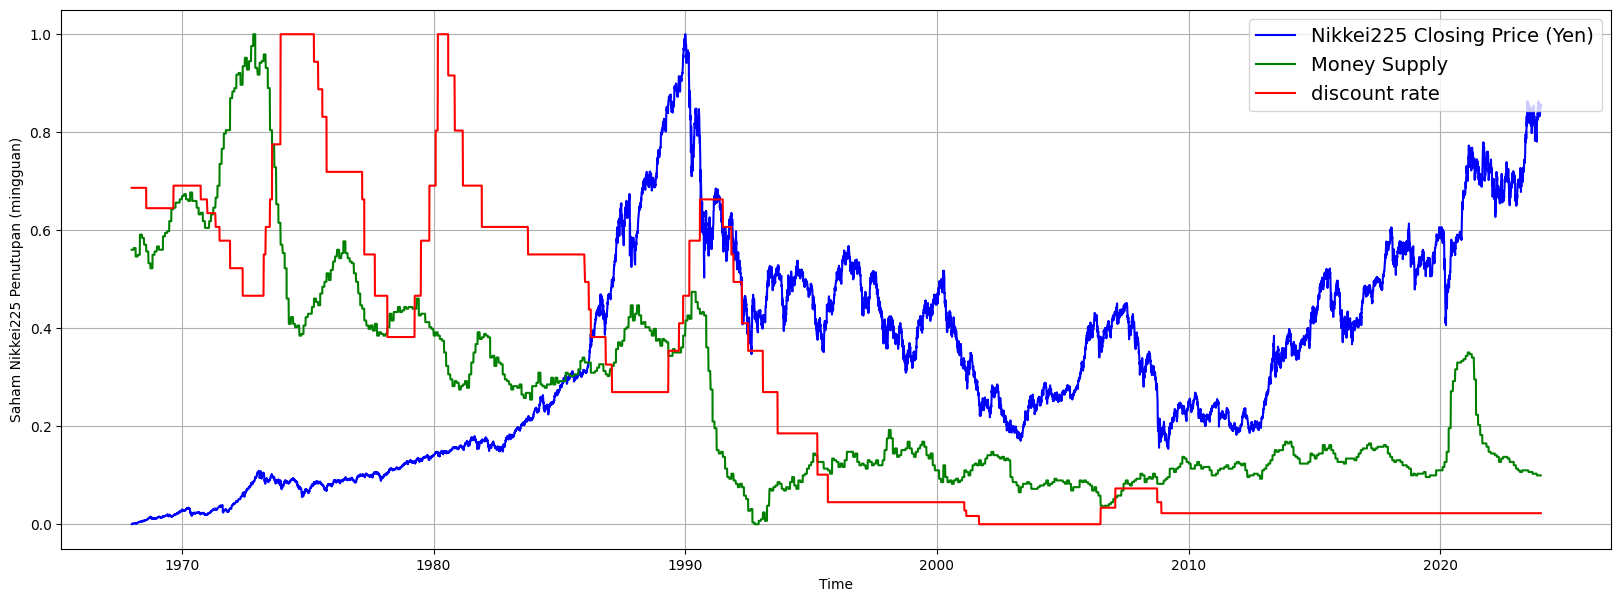

In [351]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = normalized_data[:,4], format = "-", label = "Money Supply", color ='g')
plot_time_series(timesteps = nikkei225_4_multivariate_df.index.tolist(), values = normalized_data[:,5], format = "-", label = "discount rate", color = 'r')


# menghitung korelasi antar time series

In [352]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27826931e-04],
       [4.58367695e-04],
       ...,
       [8.56894820e-01],
       [8.55420927e-01],
       [8.54920916e-01]])

In [353]:
(normalized_data[:,0])

array([0.00000000e+00, 4.27826931e-04, 4.58367695e-04, ...,
       8.56894820e-01, 8.55420927e-01, 8.54920916e-01])

In [354]:
type(normalized_data[:,0])

numpy.ndarray

In [355]:
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan mooney supply: \n", corr_coef)

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,2])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)

Correlation coefficient saham dengan mooney supply: 
 [[1.         0.99990792]
 [0.99990792 1.        ]]
Correlation coefficient saham dengan discount rate: 
 [[1.         0.99988062]
 [0.99988062 1.        ]]


In [363]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_4_multivariate_df.corr(method = "pearson")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                   Open      High       Low     Close  money_stock  \
Open           1.000000  0.999908  0.999881  0.999799    -0.470526   
High           0.999908  1.000000  0.999835  0.999901    -0.472464   
Low            0.999881  0.999835  1.000000  0.999908    -0.468540   
Close          0.999799  0.999901  0.999908  1.000000    -0.470439   
money_stock   -0.470526 -0.472464 -0.468540 -0.470439     1.000000   
discount_rate -0.484991 -0.486582 -0.483417 -0.485049     0.706540   

               discount_rate  
Open               -0.484991  
High               -0.486582  
Low                -0.483417  
Close              -0.485049  
money_stock         0.706540  
discount_rate       1.000000  


In [359]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_4_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                   Open      High       Low     Close  money_stock  \
Open           1.000000  0.999904  0.999889  0.999796    -0.438751   
High           0.999904  1.000000  0.999848  0.999904    -0.439888   
Low            0.999889  0.999848  1.000000  0.999907    -0.437482   
Close          0.999796  0.999904  0.999907  1.000000    -0.438711   
money_stock   -0.438751 -0.439888 -0.437482 -0.438711     1.000000   
discount_rate -0.445460 -0.446081 -0.444810 -0.445539     0.688417   

               discount_rate  
Open               -0.445460  
High               -0.446081  
Low                -0.444810  
Close              -0.445539  
money_stock         0.688417  
discount_rate       1.000000  


In [361]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_4_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                   Open      High       Low     Close  money_stock  \
Open           1.000000  0.994119  0.993555  0.990709    -0.297522   
High           0.994119  1.000000  0.992047  0.993998    -0.298545   
Low            0.993555  0.992047  1.000000  0.994189    -0.296439   
Close          0.990709  0.993998  0.994189  1.000000    -0.297523   
money_stock   -0.297522 -0.298545 -0.296439 -0.297523     1.000000   
discount_rate -0.287135 -0.287479 -0.286789 -0.287226     0.481280   

               discount_rate  
Open               -0.287135  
High               -0.287479  
Low                -0.286789  
Close              -0.287226  
money_stock         0.481280  
discount_rate       1.000000  


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [379]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

SPLIT_SIZE = 0.9 # 80% data untuk train test 20% untuk test size

In [380]:
nikkei225_4_multivariate_df[:2]

,Open,High,Low,Close,money_stock,discount_rate
Date,,,,,,
1968-01-04,1266.270020,1266.270020,1266.270020,1266.270020,15.7,6.21
1968-01-05,1282.380005,1282.380005,1282.380005,1282.380005,15.7,6.21


In [381]:
scaled_nikkei225_4_multivariate_df[:2]

,Open,High,Low,Close,money_stock,discount_rate
0,0.000000,0.000000,0.000000,0.000000,0.560137,0.686517
1,0.000428,0.000427,0.000429,0.000428,0.560137,0.686517


membuat window dan horizon multivariate

In [382]:

# データ数
sample_size = len(scaled_nikkei225_4_multivariate_df) - WINDOW_SIZE
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [383]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [391]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_4_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_4_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei_open, y_nikkei_open = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_nikkei_high, y_nikkei_high = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_nikkei_low, y_nikkei_low = make_dataset(Xs[2], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_nikkei_close, y_nikkei_close = make_dataset(Xs[3], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)

X_moneyStock, y_moneyStock = make_dataset(Xs[4], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[5], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei_open, X_nikkei_high, X_nikkei_low, X_nikkei_close, X_moneyStock, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei_open, y_nikkei_high, y_nikkei_low, y_nikkei_close, y_moneyStock, y_discRate], axis=2)

In [392]:
full_windows = X_concat
full_labels = y_concat

In [393]:
len(full_windows), len(full_labels)

(13766, 13766)

In [395]:
scaled_nikkei225_4_multivariate_df[:4]

,Open,High,Low,Close,money_stock,discount_rate
0,0.000000,0.000000,0.000000,0.000000,0.560137,0.686517
1,0.000428,0.000427,0.000429,0.000428,0.560137,0.686517
2,0.000458,0.000458,0.000460,0.000458,0.560137,0.686517
3,0.001053,0.001052,0.001056,0.001054,0.560137,0.686517


In [398]:
(full_windows[0])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.60137457e-01, 6.86516854e-01],
       [4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
        5.60137457e-01, 6.86516854e-01],
       [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
        5.60137457e-01, 6.86516854e-01],
       [1.05349946e-03, 1.05249902e-03, 1.05613416e-03, 1.05366112e-03,
        5.60137457e-01, 6.86516854e-01],
       [1.34429654e-03, 1.34301995e-03, 1.34765850e-03, 1.34450282e-03,
        5.60137457e-01, 6.86516854e-01],
       [1.28002833e-03, 1.27881276e-03, 1.28322955e-03, 1.28022475e-03,
        5.60137457e-01, 6.86516854e-01],
       [1.29357245e-03, 1.29234402e-03, 1.29680755e-03, 1.29377095e-03,
        5.60137457e-01, 6.86516854e-01]])

In [399]:
full_windows[1], full_windows[2]

(array([[4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
         5.60137457e-01, 6.86516854e-01],
        [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
         5.60137457e-01, 6.86516854e-01],
        [1.05349946e-03, 1.05249902e-03, 1.05613416e-03, 1.05366112e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.34429654e-03, 1.34301995e-03, 1.34765850e-03, 1.34450282e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.28002833e-03, 1.27881276e-03, 1.28322955e-03, 1.28022475e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.29357245e-03, 1.29234402e-03, 1.29680755e-03, 1.29377095e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.29357245e-03, 1.29234402e-03, 1.29680755e-03, 1.29377095e-03,
         5.60137457e-01, 6.86516854e-01]]),
 array([[4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
         5.60137457e-01, 6.86516854e-01],
        [1.05349946e-03, 1.05249902e-03, 1.05613416e-03, 1.05366112e-03,
     

In [400]:
full_labels[1]

array([[0.00150629, 0.00150486, 0.00151006, 0.00150652, 0.56013746,
        0.68651685]])

In [401]:
full_windows.shape

(13766, 7, 6)

format training atau test data pada window/fitur adalah (jumlah sample, ukuran window, jumlah variable)

In [402]:
full_labels.shape

(13766, 1, 6)

format training atau test data pada label adalah (jumlah sample, jumlah variabel)

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [403]:
(sample_size), (train_size), (test_size)

(13766, 12389, 1377)

In [404]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size-1:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size-1:]

In [405]:
"windows", train_windows[:3], "Labels",test_labels[:3]

('windows',
 array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          5.60137457e-01, 6.86516854e-01],
         [4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
          5.60137457e-01, 6.86516854e-01],
         [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
          5.60137457e-01, 6.86516854e-01],
         [1.05349946e-03, 1.05249902e-03, 1.05613416e-03, 1.05366112e-03,
          5.60137457e-01, 6.86516854e-01],
         [1.34429654e-03, 1.34301995e-03, 1.34765850e-03, 1.34450282e-03,
          5.60137457e-01, 6.86516854e-01],
         [1.28002833e-03, 1.27881276e-03, 1.28322955e-03, 1.28022475e-03,
          5.60137457e-01, 6.86516854e-01],
         [1.29357245e-03, 1.29234402e-03, 1.29680755e-03, 1.29377095e-03,
          5.60137457e-01, 6.86516854e-01]],
 
        [[4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
          5.60137457e-01, 6.86516854e-01],
         [4.58367695e-04, 4.57932411e-04, 4.59514

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [406]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [407]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  #from sklearn.metrics import r2_score
  #Rsquare = r2_score(y_true, y_pred)

  # Calculate the mean of the true values
  y_true_mean = tf.reduce_mean(y_true, axis=0)

  # Calculate the total sum of squares (SS_tot)
  SS_tot = tf.reduce_sum(tf.square(y_true - y_true_mean))

  # Calculate the sum of squares of the residuals (SS_res)
  SS_res = tf.reduce_sum(tf.square(y_true - y_pred))

  # Calculate the R-squared value
  Rsquare = 1 - (SS_res / SS_tot)


  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [408]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 1,
                                                                    save_best_only = True)

# Model 0 : Keras Encoder & Decoder

In [409]:
train_windows.shape

(12389, 7, 6)

In [410]:
train_windows[0:2]

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.60137457e-01, 6.86516854e-01],
        [4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
         5.60137457e-01, 6.86516854e-01],
        [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
         5.60137457e-01, 6.86516854e-01],
        [1.05349946e-03, 1.05249902e-03, 1.05613416e-03, 1.05366112e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.34429654e-03, 1.34301995e-03, 1.34765850e-03, 1.34450282e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.28002833e-03, 1.27881276e-03, 1.28322955e-03, 1.28022475e-03,
         5.60137457e-01, 6.86516854e-01],
        [1.29357245e-03, 1.29234402e-03, 1.29680755e-03, 1.29377095e-03,
         5.60137457e-01, 6.86516854e-01]],

       [[4.27826931e-04, 4.27420651e-04, 4.28896885e-04, 4.27892582e-04,
         5.60137457e-01, 6.86516854e-01],
        [4.58367695e-04, 4.57932411e-04, 4.59514028e-04, 4.58438031e-04,
     

In [411]:
train_labels[0:2]

array([[[0.00129357, 0.00129234, 0.00129681, 0.00129377, 0.56013746,
         0.68651685]],

       [[0.00150629, 0.00150486, 0.00151006, 0.00150652, 0.56013746,
         0.68651685]]])

In [412]:
train_labels.shape

(12389, 1, 6)

In [413]:
test_windows.shape

(1378, 7, 6)

In [414]:
test_labels.shape

(1378, 1, 6)

In [415]:
# keterangan jumlah feature
test_labels.shape[2]

6

Mulai membuat model Keras

In [195]:
import tensorflow as tf
from tensorflow.keras import layers

In [196]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

In [197]:
def define_model():
  #define the input data shape
  encoder_inputs = Input(shape = (WINDOW_SIZE, train_windows.shape[2]))

  # use single BILSTM as Encoder
  #Here we can use bigger network also like one BILSTM with reutrn_sequences = True and
  # Other BILSTM with return_sequences = False
  # OR CNN, CNN-LSTM, and so many
  encoder = (LSTM(units = 128, return_sequences=True))(encoder_inputs)

  # apply RepeatVector to get the result for multiple time steps (here out output_timesteps = 2)
  # for this step decoder operation start
  #repeat_output = RepeatVector(output_timesteps)(encoder)
  decoder = (LSTM(units = 64, return_sequences=False))(encoder)

  # use TimeDistributed layer to get multiple output features
  out = Dense(test_labels.shape[2])(decoder)
  #out = TimeDistributed(Dense(output_features))(decoder)
  model = Model(encoder_inputs , out)

  # compile the model
  model.compile(loss = 'mae', optimizer = 'adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  model.summary()
  return model

In [198]:
# call the model
model_0 = define_model()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30, 3)]           0         
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           67584     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 117187 (457.76 KB)
Trainable params: 117187 (457.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [199]:
# fit the model
model_0.fit(train_windows,
            train_labels,
            epochs = 10,
            batch_size=128,
            verbose = 1,
            validation_data = (test_windows, test_labels)
            )



Epoch 1/10
97/97 [==============================] - 21s 176ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - val_loss: 0.2195 - val_mean_absolute_error: 0.2184
Epoch 2/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - val_loss: 0.1998 - val_mean_absolute_error: 0.1987
Epoch 3/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2014 - mean_absolute_error: 0.2013 - val_loss: 0.2106 - val_mean_absolute_error: 0.2095
Epoch 4/10
97/97 [==============================] - 14s 148ms/step - loss: 0.2009 - mean_absolute_error: 0.2008 - val_loss: 0.2050 - val_mean_absolute_error: 0.2040
Epoch 5/10
97/97 [==============================] - 14s 147ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - val_loss: 0.2287 - val_mean_absolute_error: 0.2276
Epoch 6/10
97/97 [==============================] - 15s 156ms/step - loss: 0.2010 - mean_absolute_error: 0.2009 - val_loss: 0.2183 - val_mean_absolute_error: 0.2173
Epoch 7/10

In [200]:
# mengevaluasi model 6 dari epochs terakhir
model_0.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 21ms/step - loss: 0.2212 - mean_absolute_error: 0.2212


[0.22122806310653687, 0.22122806310653687]

In [201]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_0_preds = tf.squeeze(model_0.predict(test_windows))
model_0_preds



43/43 [==============================] - 2s 20ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0.29579633, 0.15317316, 0.27016988],
       [0.2958143 , 0.15317717, 0.2701911 ],
       [0.29582685, 0.1531755 , 0.27020568],
       ...,
       [0.29618877, 0.15137501, 0.27133155],
       [0.29615498, 0.1513462 , 0.27131253],
       [0.2961399 , 0.15133233, 0.27131215]], dtype=float32)>

In [202]:
model_0_preds[:,2]

<tf.Tensor: shape=(1376,), dtype=float32, numpy=
array([0.27016988, 0.2701911 , 0.27020568, ..., 0.27133155, 0.27131253,
       0.27131215], dtype=float32)>

In [203]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_0_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_0_preds)

model_0_results

{'mae': 0.22122814,
 'mse': 0.06837606,
 'rmse': 0.25699645,
 'mape': 397.52783,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-11.089343>}

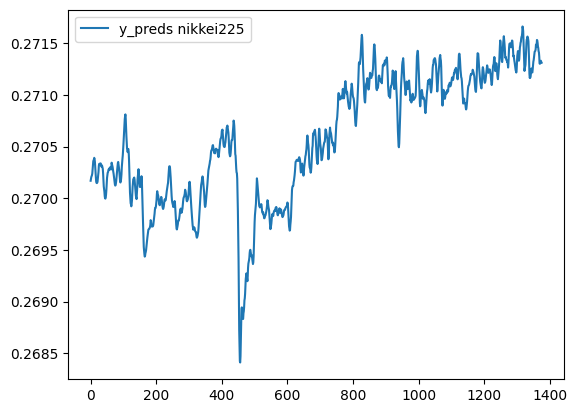

In [204]:
import matplotlib.pyplot as plt

plt.plot(model_0_preds[:,2], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

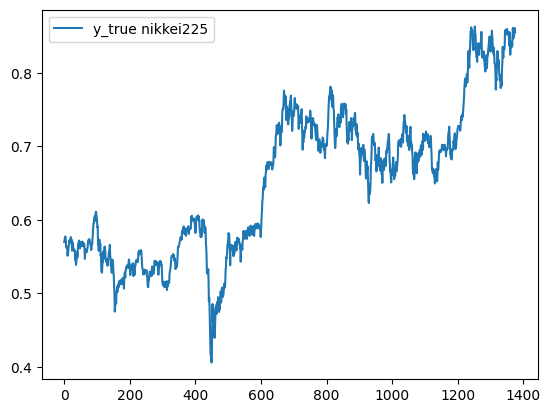

In [205]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Model 1: Membuat model Convolutional (Conv1D)

In [416]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [417]:
train_windows.shape

(12389, 7, 6)

In [418]:
train_labels.shape

(12389, 1, 6)

In [419]:
test_windows.shape

(1378, 7, 6)

In [420]:
test_labels.shape

(1378, 1, 6)

In [421]:
test_labels.shape[2]

6

In [422]:
tf.random.set_seed(42)

#create Conv1D model
model_1 = tf.keras.models.Sequential([
    #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(filters = 256, kernel_size = 10, strides = 1, padding ="causal", activation = "relu"),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
    tf.keras.layers.Dense(test_labels.shape[2], activation = "relu")
    #filters adalah jumlah hidden unit dalam layers tersebut
    # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
    # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
], name = "model_1_conv1D")

#compile model 1
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.SGD())

# fit
model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.2453
Epoch 1: val_loss improved from inf to 0.32438, saving model to model_experiments/model_1_conv1D
97/97 [==============================] - 2s 15ms/step - loss: 0.2453 - val_loss: 0.3244
Epoch 2/10
92/97 [===========================>..] - ETA: 0s - loss: 0.2278
Epoch 2: val_loss did not improve from 0.32438
97/97 [==============================] - 1s 8ms/step - loss: 0.2277 - val_loss: 0.3318
Epoch 3/10
94/97 [============================>.] - ETA: 0s - loss: 0.2269
Epoch 3: val_loss did not improve from 0.32438
97/97 [==============================] - 1s 10ms/step - loss: 0.2268 - val_loss: 0.3365
Epoch 4/10
94/97 [============================>.] - ETA: 0s - loss: 0.2263
Epoch 4: val_loss did not improve from 0.32438
97/97 [==============================] - 1s 13ms/step - loss: 0.2263 - val_loss: 0.3377
Epoch 5/10
91/97 [===========================>..] - ETA: 0s - loss: 0.2259
Epoch 5: val_loss did not improve fr

In [423]:
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 256)            15616     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 17158 (67.02 KB)
Trainable params: 17158 (67.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [424]:
# mengevaluasi model 6 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

44/44 [==============================] - 0s 3ms/step - loss: 0.3468


0.34677308797836304

In [425]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("model_experiments/model_1_conv1D")
model_1.evaluate(test_windows, test_labels)


44/44 [==============================] - 0s 2ms/step - loss: 0.3244


0.32437846064567566

In [426]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds



44/44 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1378, 6), dtype=float32, numpy=
array([[0.26806766, 0.28449085, 0.        , 0.33638102, 0.        ,
        0.15882018],
       [0.26842287, 0.28488266, 0.        , 0.3361469 , 0.        ,
        0.15884057],
       [0.2682392 , 0.28444755, 0.        , 0.3362821 , 0.        ,
        0.15895215],
       ...,
       [0.33095944, 0.35257056, 0.        , 0.4458688 , 0.        ,
        0.21394971],
       [0.33126608, 0.35214716, 0.        , 0.4473676 , 0.        ,
        0.21506526],
       [0.3332431 , 0.35401547, 0.        , 0.44822198, 0.        ,
        0.21571755]], dtype=float32)>

In [427]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results

{'mae': 0.32437846,
 'mse': 0.13841651,
 'rmse': 0.36629012,
 'mape': 172.08717,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-16.190834>}

In [428]:
model_1_results

{'mae': 0.32437846,
 'mse': 0.13841651,
 'rmse': 0.36629012,
 'mape': 172.08717,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-16.190834>}

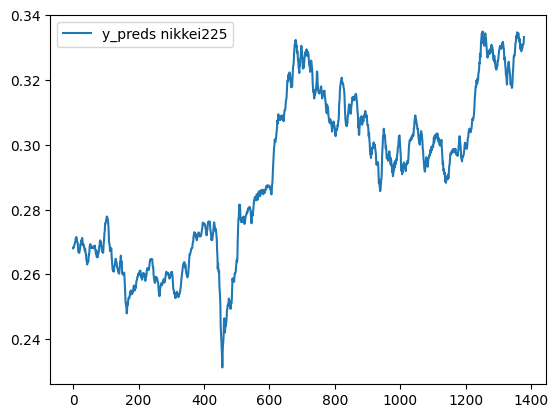

In [429]:
import matplotlib.pyplot as plt

plt.plot(model_1_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

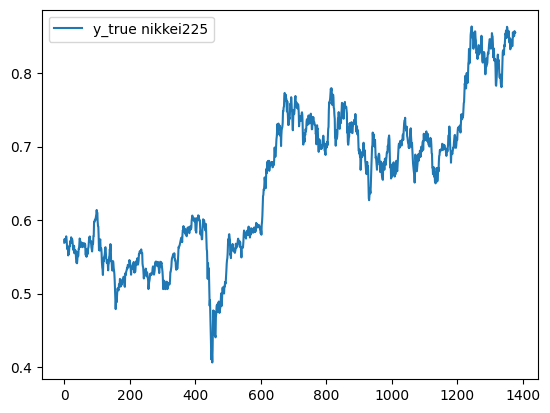

In [430]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Model 2 : LSTM

In [431]:
train_windows.shape[2]

6

In [432]:
model_2 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(train_windows.shape[1], train_windows.shape[2]), return_sequences = True, activation = "sigmoid"),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64, return_sequences=True, activation = "sigmoid"),
        tf.keras.layers.LSTM(64, return_sequences=False, activation = "sigmoid"),

        tf.keras.layers.Dense(test_labels.shape[2])
        ], name = "model_2_LSTM")



#compile model 2
model_2.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/10
96/97 [============================>.] - ETA: 0s - loss: 0.1923
Epoch 1: val_loss improved from inf to 0.30751, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 15s 113ms/step - loss: 0.1923 - val_loss: 0.3075
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.1834
Epoch 2: val_loss improved from 0.30751 to 0.29867, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 10s 101ms/step - loss: 0.1834 - val_loss: 0.2987
Epoch 3/10
96/97 [============================>.] - ETA: 0s - loss: 0.1834
Epoch 3: val_loss improved from 0.29867 to 0.27822, saving model to model_experiments/model_2_LSTM
97/97 [==============================] - 10s 103ms/step - loss: 0.1834 - val_loss: 0.2782
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.1837
Epoch 4: val_loss did not improve from 0.27822
97/97 [==============================] - 6s 64ms/step - loss: 0.1837 - val_loss: 0.2811
Ep

In [433]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 7, 128)            69120     
                                                                 
 lstm_25 (LSTM)              (None, 7, 64)             49408     
                                                                 
 lstm_26 (LSTM)              (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 6)                 390       
                                                                 
Total params: 151942 (593.52 KB)
Trainable params: 151942 (593.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [434]:
# mengevaluasi model 6 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

44/44 [==============================] - 1s 11ms/step - loss: 0.2890


0.2890090048313141

In [435]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("model_experiments/model_2_LSTM")
model_2.evaluate(test_windows, test_labels)


44/44 [==============================] - 1s 9ms/step - loss: 0.2586


0.25858452916145325

In [436]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



44/44 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(1378, 6), dtype=float32, numpy=
array([[0.31760737, 0.32768008, 0.33478552, 0.3235733 , 0.16107215,
        0.20595486],
       [0.31760958, 0.32768297, 0.3347877 , 0.32357374, 0.16107258,
        0.20595413],
       [0.3176115 , 0.3276859 , 0.33478862, 0.32357502, 0.16107263,
        0.2059539 ],
       ...,
       [0.31783056, 0.32794404, 0.3350149 , 0.32364693, 0.16113944,
        0.2058652 ],
       [0.31783482, 0.32794985, 0.33502084, 0.32364672, 0.16113853,
        0.20586392],
       [0.3178346 , 0.32794902, 0.33501944, 0.32364756, 0.16114071,
        0.20586343]], dtype=float32)>

In [437]:
model_2_preds[:,2]

<tf.Tensor: shape=(1378,), dtype=float32, numpy=
array([0.33478552, 0.3347877 , 0.33478862, ..., 0.3350149 , 0.33502084,
       0.33501944], dtype=float32)>

In [438]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)

model_2_results

{'mae': 0.25858453,
 'mse': 0.08458682,
 'rmse': 0.27974704,
 'mape': 175.14479,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-9.505377>}

In [439]:
tf.squeeze(test_labels[:, :, 0])

<tf.Tensor: shape=(1378,), dtype=float64, numpy=
array([0.56934843, 0.57423937, 0.57000753, ..., 0.85689482, 0.85542093,
       0.85492092])>

In [440]:
test_labels[:, :, 0]

array([[0.56934843],
       [0.57423937],
       [0.57000753],
       ...,
       [0.85689482],
       [0.85542093],
       [0.85492092]])

In [441]:
model_1_results

{'mae': 0.32437846,
 'mse': 0.13841651,
 'rmse': 0.36629012,
 'mape': 172.08717,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-16.190834>}

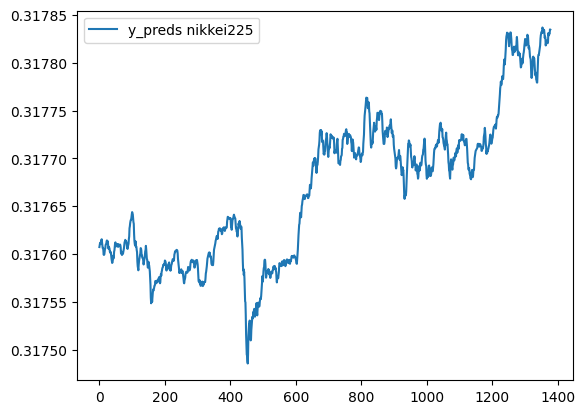

In [442]:
import matplotlib.pyplot as plt

plt.plot(model_2_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

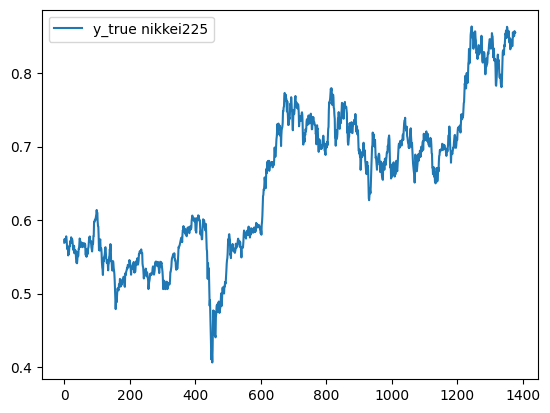

In [443]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Model 3 : CNN_LSTM

In [234]:
model_3 = tf.keras.models.Sequential([
  # YOUR CODE HERE.
  tf.keras.layers.Conv1D(filters=128, kernel_size=10, strides=1, padding="causal", activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=False),

  tf.keras.layers.Dense(test_labels.shape[2]),
  ], name = "model_3_CNN-LSTM")



#compile model 3
model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.2044
Epoch 1: val_loss improved from inf to 0.20225, saving model to model_experiments/model_3_CNN-LSTM
97/97 [==============================] - 41s 365ms/step - loss: 0.2044 - val_loss: 0.2022
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.2012
Epoch 2: val_loss improved from 0.20225 to 0.19857, saving model to model_experiments/model_3_CNN-LSTM
97/97 [==============================] - 34s 352ms/step - loss: 0.2012 - val_loss: 0.1986
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.2014
Epoch 3: val_loss did not improve from 0.19857
97/97 [==============================] - 23s 241ms/step - loss: 0.2014 - val_loss: 0.2106
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.2008
Epoch 4: val_loss did not improve from 0.19857
97/97 [==============================] - 22s 222ms/step - loss: 0.2008 - val_loss: 0.2080
Epoch 5/10
97/97 [==========================

In [235]:
model_3.summary()

Model: "model_3_CNN-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 128)           3968      
                                                                 
 lstm_21 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_22 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 201795 (788.26 KB)
Trainable params: 201795 (788.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [236]:
# mengevaluasi model 6 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

43/43 [==============================] - 1s 28ms/step - loss: 0.2236


0.22358226776123047

In [237]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("model_experiments/model_3_CNN-LSTM")
model_3.evaluate(test_windows, test_labels)


43/43 [==============================] - 3s 31ms/step - loss: 0.1986


0.1985732913017273

In [238]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



43/43 [==============================] - 3s 31ms/step


<tf.Tensor: shape=(1376, 3), dtype=float32, numpy=
array([[0.31332225, 0.15149361, 0.22114728],
       [0.31340373, 0.15152788, 0.22121166],
       [0.31348068, 0.15155967, 0.22127321],
       ...,
       [0.32904974, 0.15769376, 0.23368512],
       [0.32901224, 0.15767433, 0.23364612],
       [0.32897356, 0.15765797, 0.2336014 ]], dtype=float32)>

In [239]:
model_3_preds[:,2]

<tf.Tensor: shape=(1376,), dtype=float32, numpy=
array([0.22114728, 0.22121166, 0.22127321, ..., 0.23368512, 0.23364612,
       0.2336014 ], dtype=float32)>

In [240]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)

model_3_results

{'mae': 0.1985734,
 'mse': 0.055968285,
 'rmse': 0.23148087,
 'mape': 330.31033,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-8.895565>}

In [241]:
tf.squeeze(test_labels[:, :, 0])

<tf.Tensor: shape=(1376,), dtype=float64, numpy=
array([0.56975266, 0.57297019, 0.57541352, ..., 0.86096445, 0.857203  ,
       0.85519902])>

In [242]:
test_labels[:, :, 0]

array([[0.56975266],
       [0.57297019],
       [0.57541352],
       ...,
       [0.86096445],
       [0.857203  ],
       [0.85519902]])

In [243]:
model_1_results

{'mae': 0.27822948,
 'mse': 0.15611906,
 'rmse': 0.39047116,
 'mape': 100.0,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-26.602907>}

In [244]:
model_3_results

{'mae': 0.1985734,
 'mse': 0.055968285,
 'rmse': 0.23148087,
 'mape': 330.31033,
 'R-square': <tf.Tensor: shape=(), dtype=float32, numpy=-8.895565>}

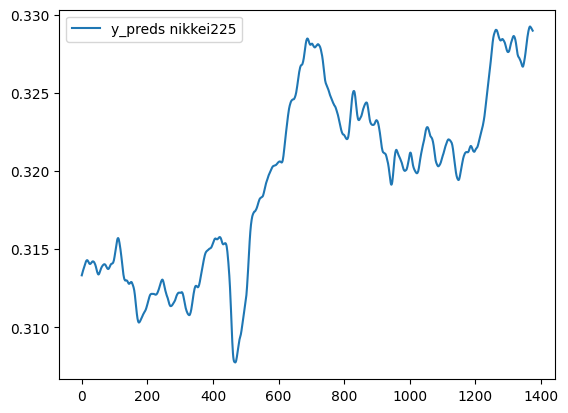

In [248]:
import matplotlib.pyplot as plt

plt.plot(model_3_preds[:,0], label='y_preds nikkei225')

#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

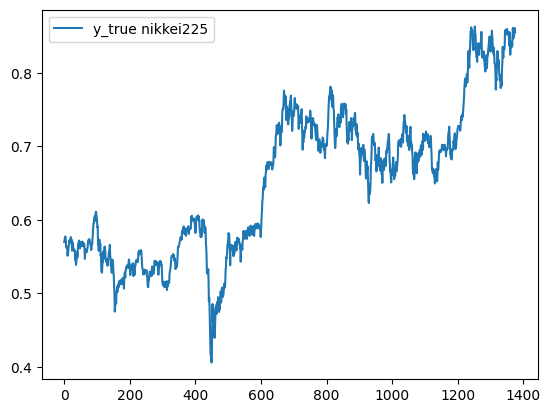

In [247]:
plt.plot(test_labels[:, :, 0], label='y_true nikkei225')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()